In [1]:
import os 
import shutil
from glob import glob
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import PIL
from PIL import Image

from utilities import process_image

# Clean Hand Drawn Images

In [2]:
fps = glob('./hand_drawn/raw/*/*.png')
fps[0:5]

['./hand_drawn/raw/ii/ii_hand_3.png',
 './hand_drawn/raw/ii/ii_hand_2.png',
 './hand_drawn/raw/ii/ii_hand_5.png',
 './hand_drawn/raw/ii/ii_hand_1.png',
 './hand_drawn/raw/ii/ii_hand_0.png']

0.12549019607843137 1.0
0 1


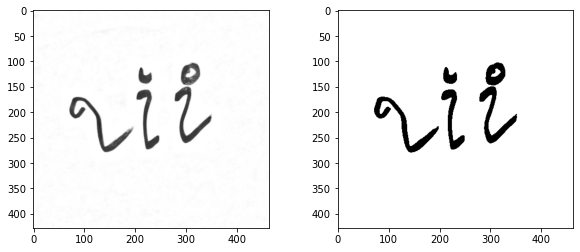

In [3]:
fp = './hand_drawn/raw/vii/vii_hand_16.png'
im = Image.open(fp)
im = np.asarray(im)
im_source = im.copy()
im = im[:, :, 0] / 255
print(im.min(), im.max())
im = np.where(im < 0.9, 0, 1)
print(im.min(), im.max())
im *= 255
im = np.round(im).astype(np.uint8)
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(Image.open(fp), cmap='binary_r')
ax2.imshow(im, cmap='binary_r')

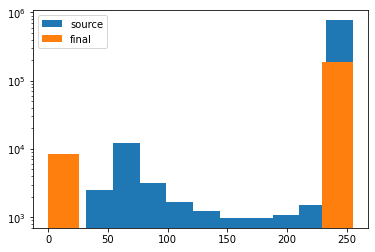

In [4]:
plt.hist(im_source.flatten())
plt.hist(im.flatten())
plt.legend(['source', 'final'])
plt.yscale('log')

In [5]:
for fp in fps:
    im = Image.open(fp)
    im = np.asarray(im)
    im = im[:, :, 0] / 255
    im = np.round(im)
    im *= 255
    im = np.round(im).astype(np.uint8)
    im = Image.fromarray(im)
    fp_out = fp.replace('/raw', '/cleaned')
    if not os.path.exists(os.path.dirname(fp_out)):
        os.makedirs(os.path.dirname(fp_out))
#     im.save(fp_out)
    process_image(fp, fp_out, erode='random')

# Copy Hand Drawn to Baseline Aug Dir

In [6]:
dir_tag = 'data_baseline_aug'

data_dir = f'./{dir_tag}/{dir_tag}'
train_dir = data_dir + '/train'
val_dir = data_dir + '/val'

source = data_dir.replace(dir_tag, 'data_baseline_clean')

In [7]:
train_dir

'./data_baseline_aug/data_baseline_aug/train'

In [8]:
if os.path.exists(data_dir):
    shutil.rmtree(data_dir)

shutil.copytree(source, data_dir)
shutil.rmtree(data_dir + '/ignore')

In [9]:
im_dset = tf.keras.preprocessing.image_dataset_from_directory(
    './hand_drawn/cleaned',
    labels="inferred",
    label_mode="categorical",
    class_names=["ii", "iv", "v", "vi", "vii", "viii", "ix"],
    shuffle=False,
    seed=123,
    batch_size=8,
    image_size=(256, 256),
)

Found 74 files belonging to 7 classes.


In [10]:
images = list(im_dset.unbatch())
file_paths = im_dset.file_paths

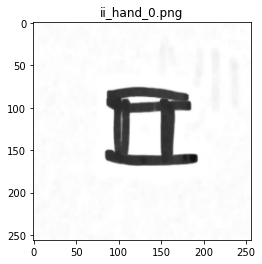

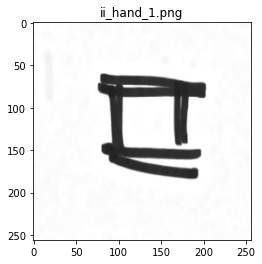

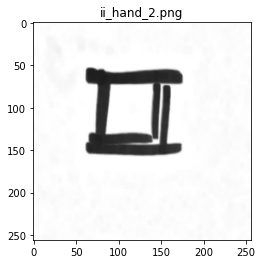

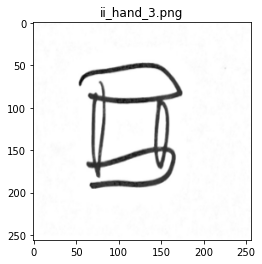

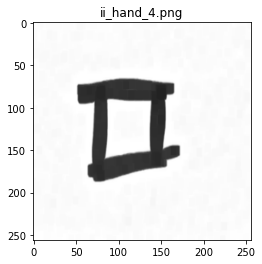

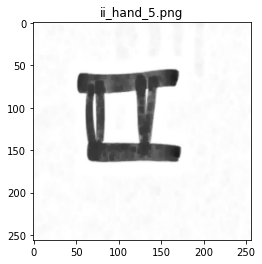

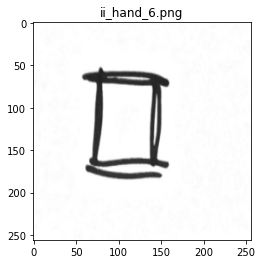

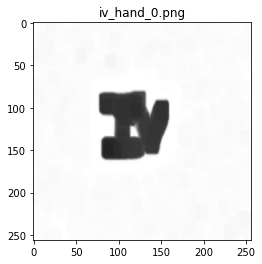

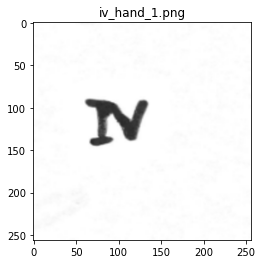

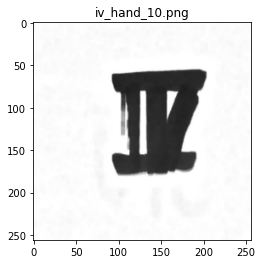

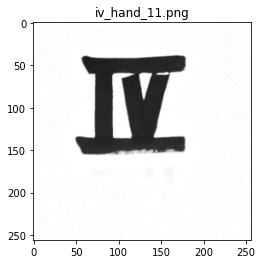

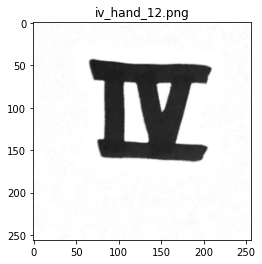

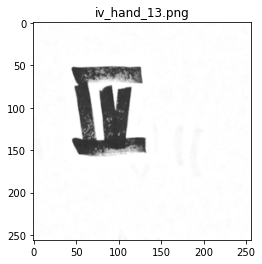

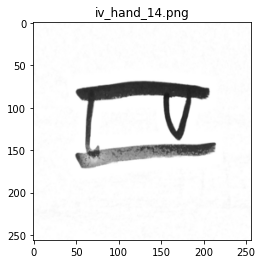

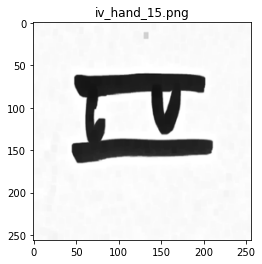

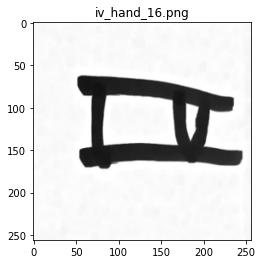

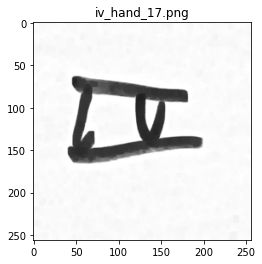

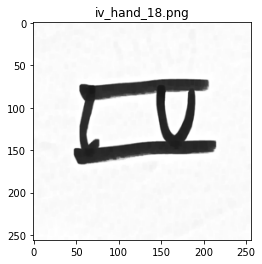

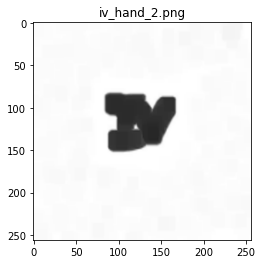

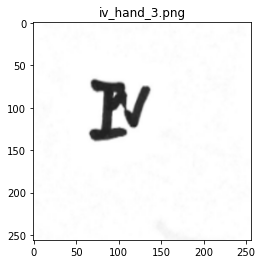

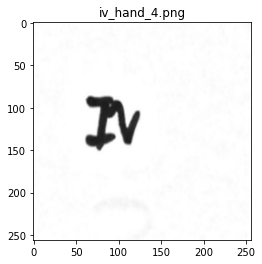

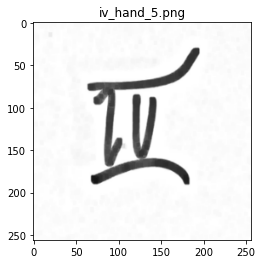

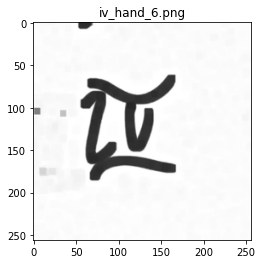

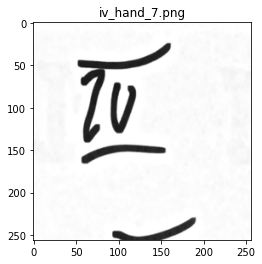

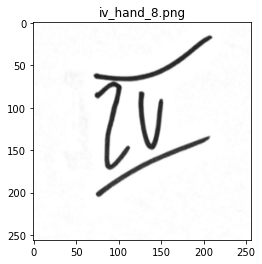

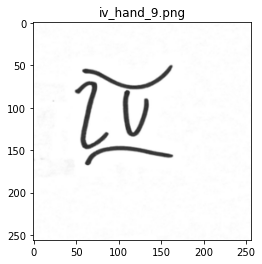

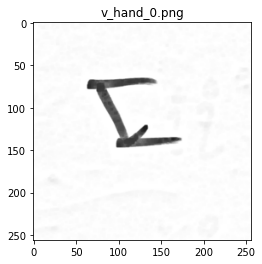

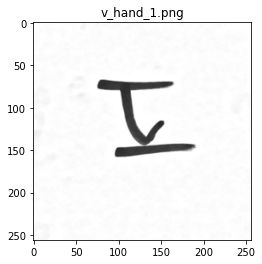

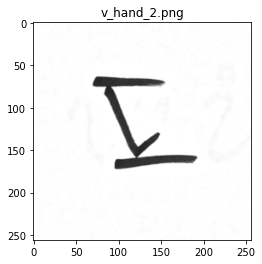

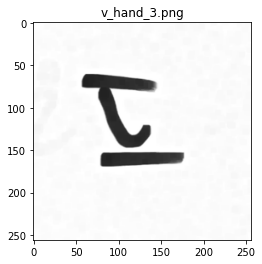

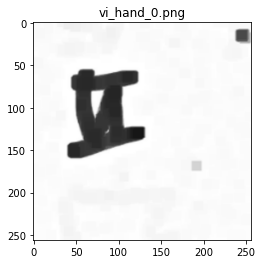

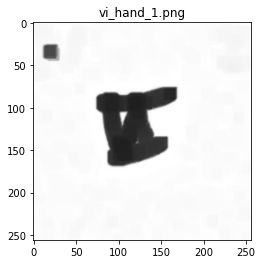

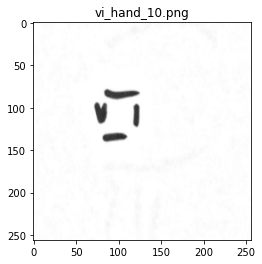

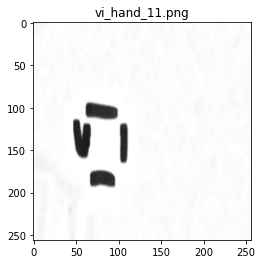

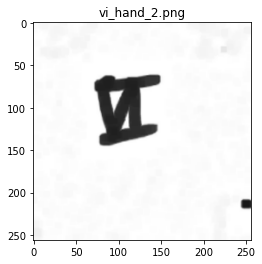

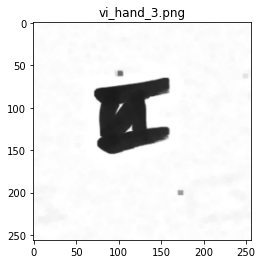

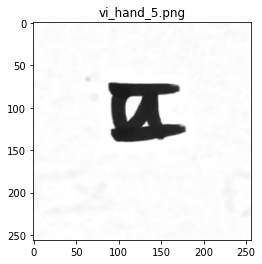

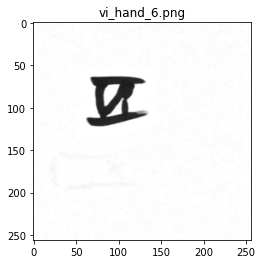

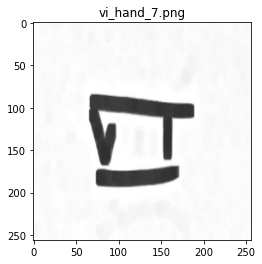

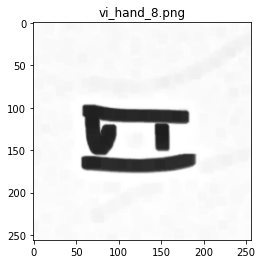

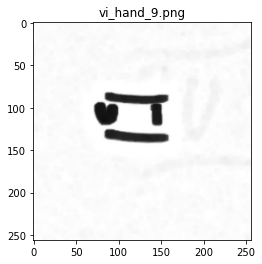

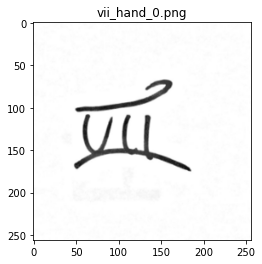

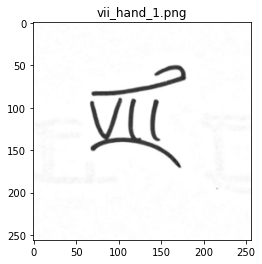

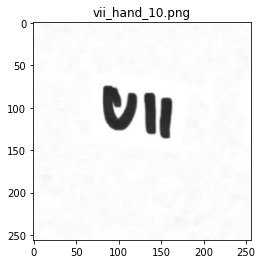

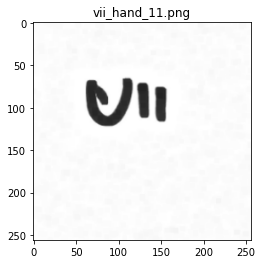

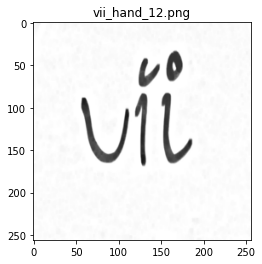

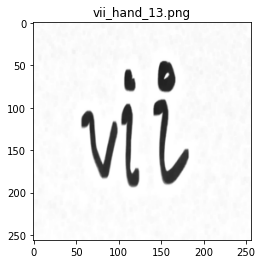

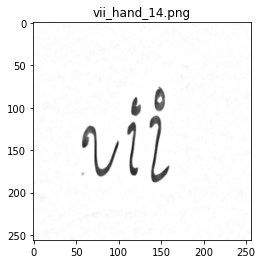

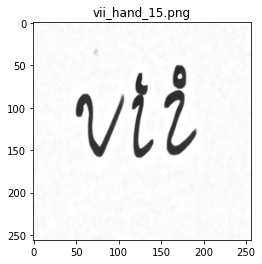

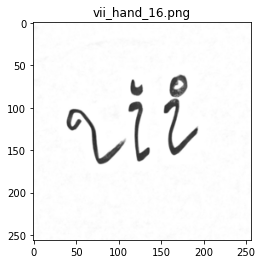

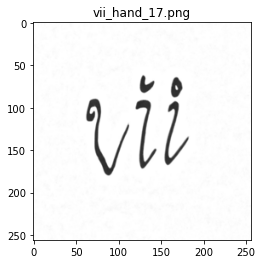

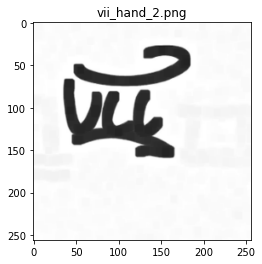

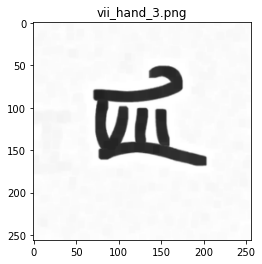

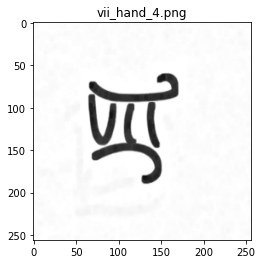

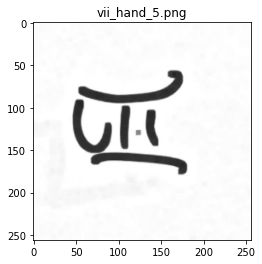

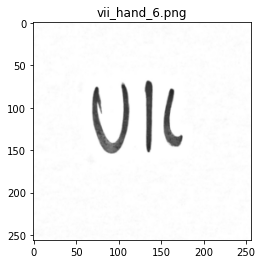

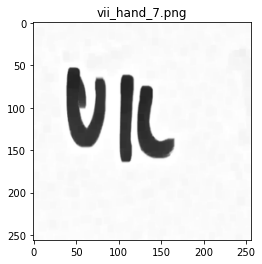

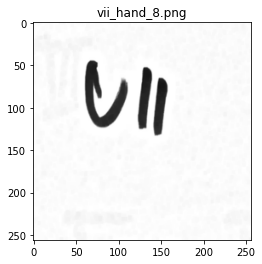

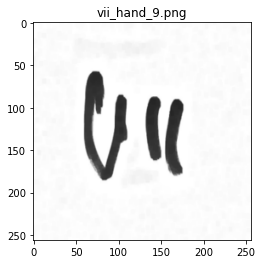

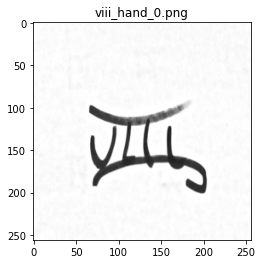

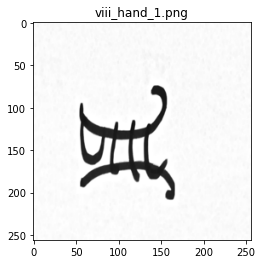

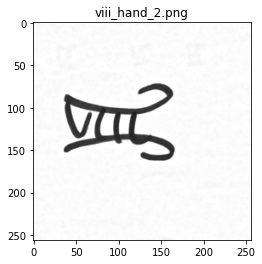

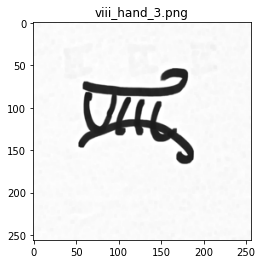

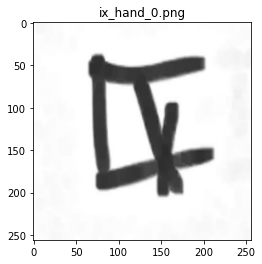

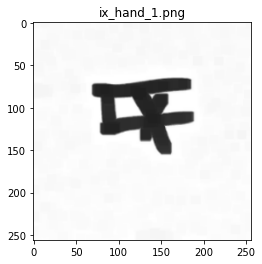

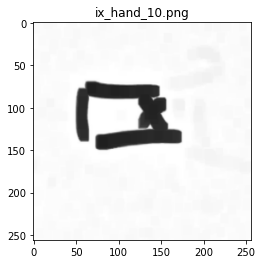

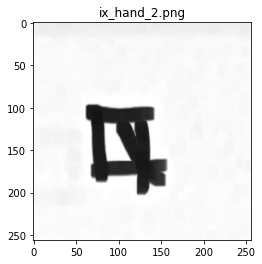

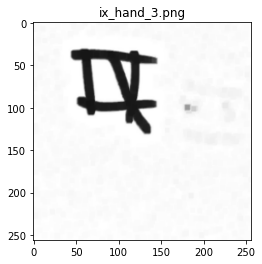

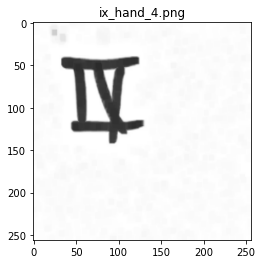

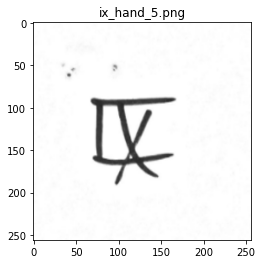

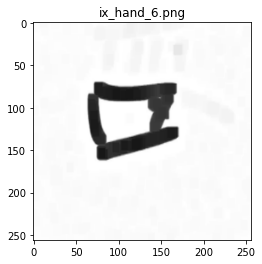

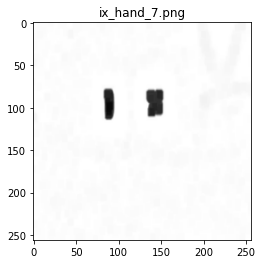

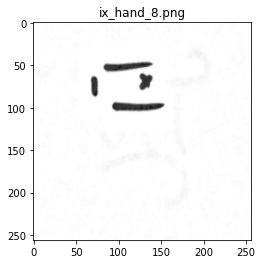

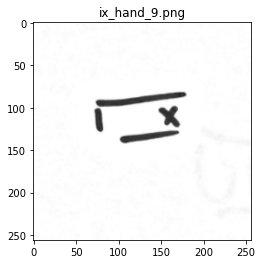

In [11]:
for im, fp_source in zip(images, file_paths):
#     image = np.asarray(Image.open(fp_source)).astype(np.uint8)
    image = im[0].numpy().astype(np.uint8)
    num = os.path.basename(os.path.dirname(fp_source))
    fn = os.path.basename(fp_source)
    fp_out = '{}/{}/{}'.format(val_dir, num, fn)
    
#     process_image(fp_source, fp_out, erode=2)
    image_out = Image.fromarray(image)
    image_out.save(fp_out)
    plt.imshow(image)
    plt.title(fn)
    plt.show()
    plt.close()
#     process_image(fp_source, fp_out, show=True)

# Show label data

Found 52 files belonging to 10 classes.


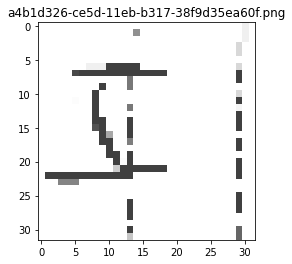

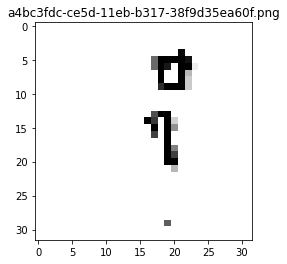

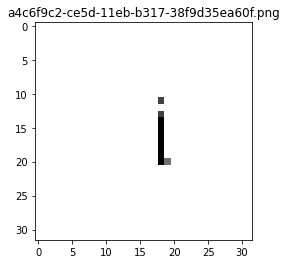

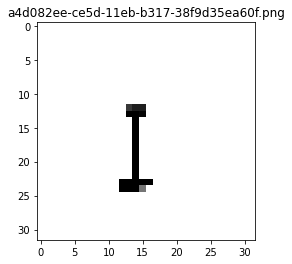

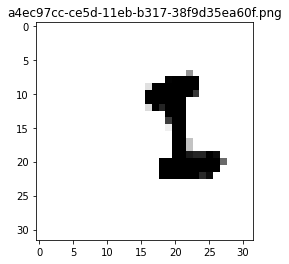

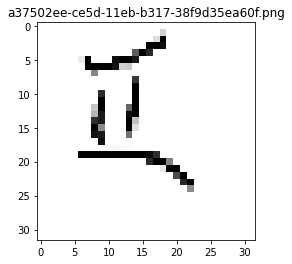

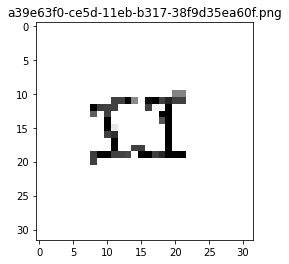

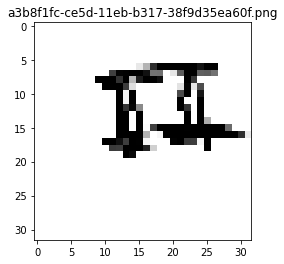

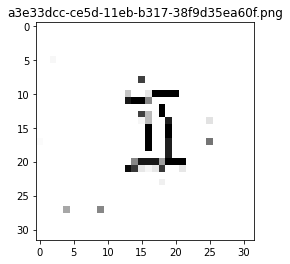

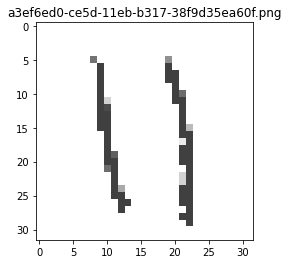

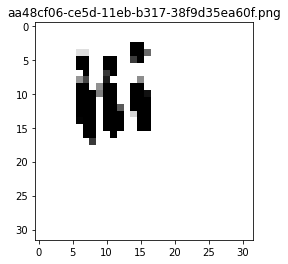

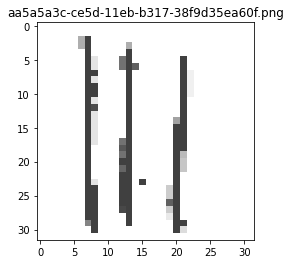

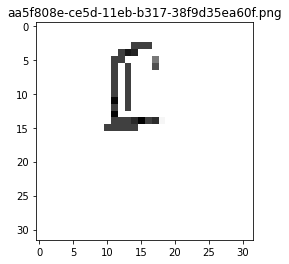

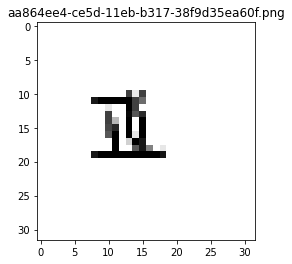

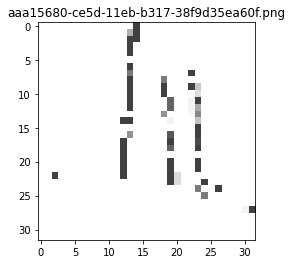

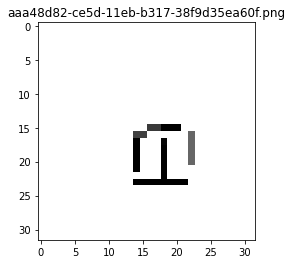

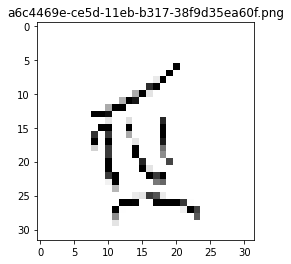

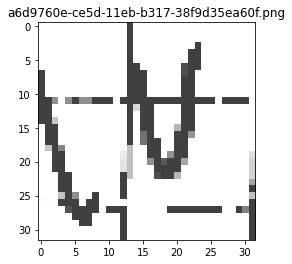

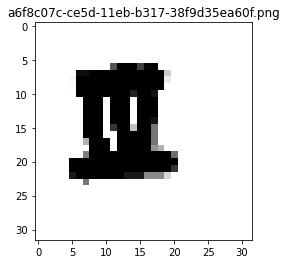

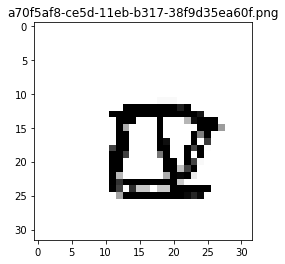

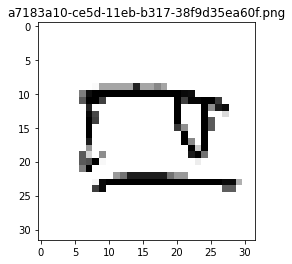

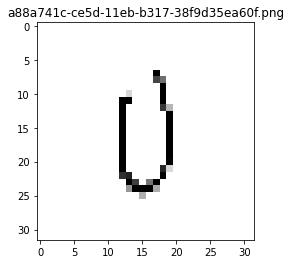

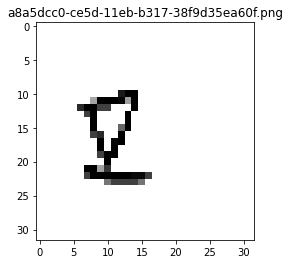

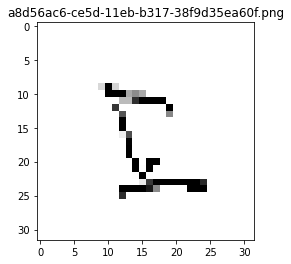

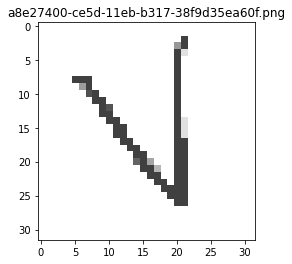

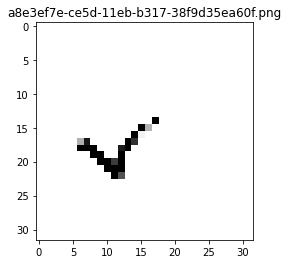

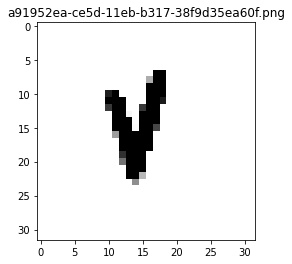

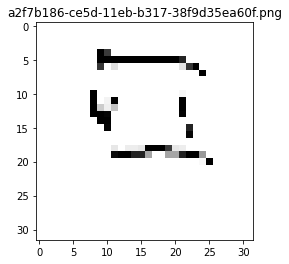

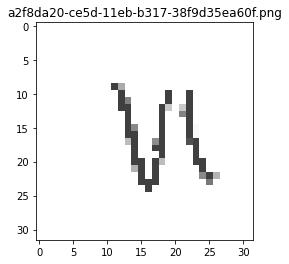

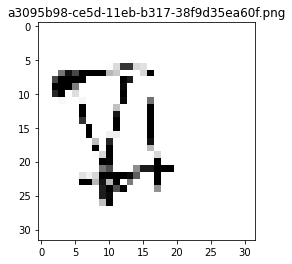

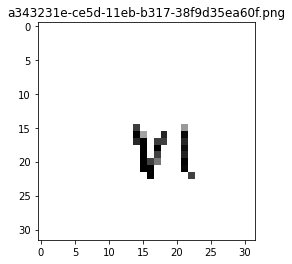

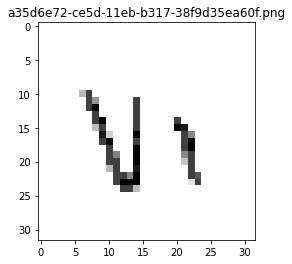

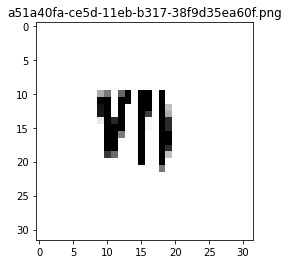

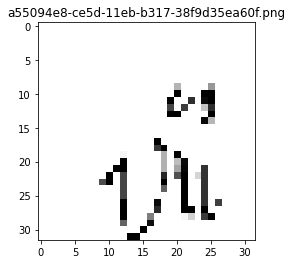

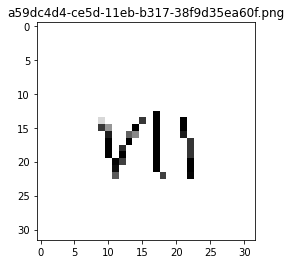

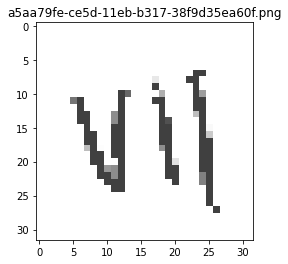

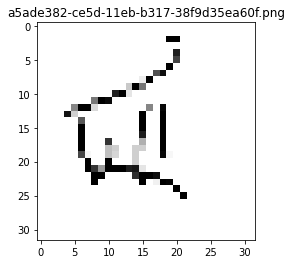

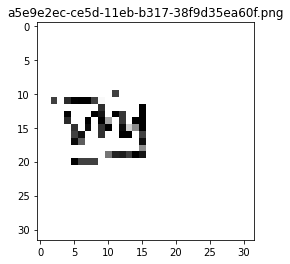

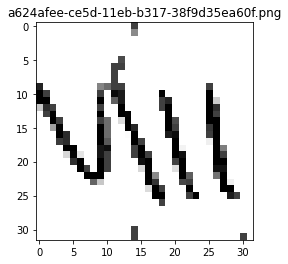

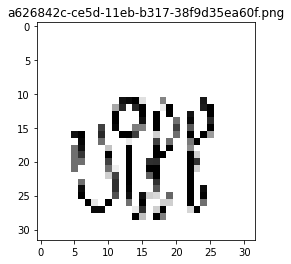

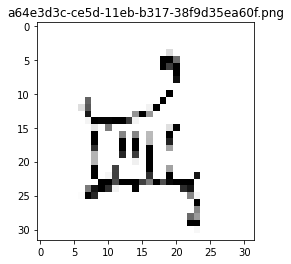

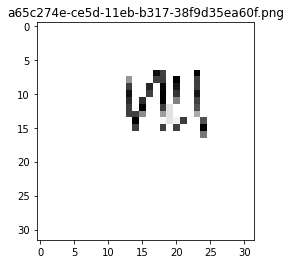

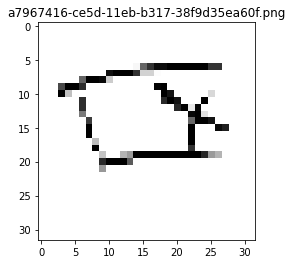

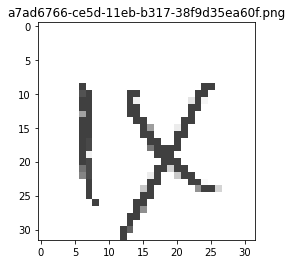

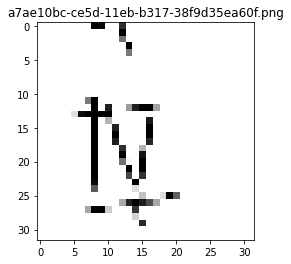

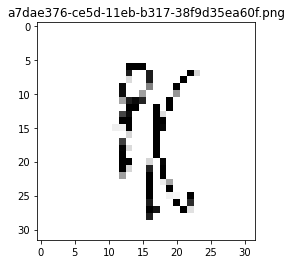

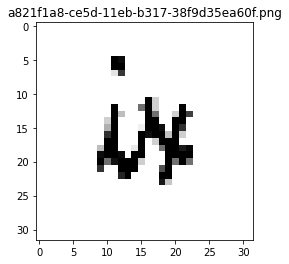

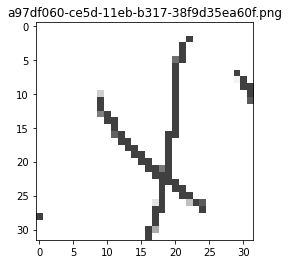

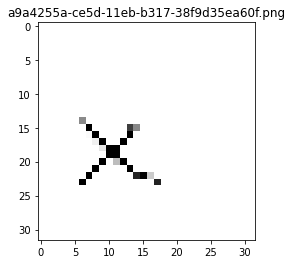

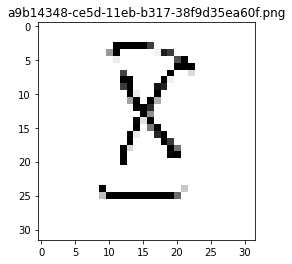

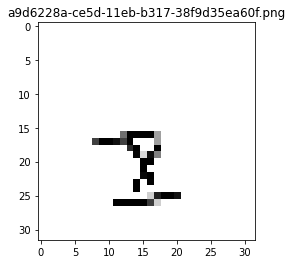

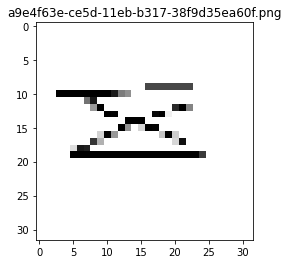

In [12]:
im_dset = tf.keras.preprocessing.image_dataset_from_directory(
    './label_book/label_book',
    labels="inferred",
    label_mode="categorical",
    class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
    shuffle=False,
    seed=123,
    batch_size=8,
    image_size=(32, 32),
)

images = list(im_dset.unbatch())
file_paths = im_dset.file_paths

for im, fp_source in zip(images, file_paths):
#     image = np.asarray(Image.open(fp_source)).astype(np.uint8)
    image = im[0].numpy().astype(np.uint8)
    num = os.path.basename(os.path.dirname(fp_source))
    fn = os.path.basename(fp_source)
    image_out = Image.fromarray(image)
    plt.imshow(image)
    plt.title(fn)
    plt.show()
    plt.close()